### Load and Preprocess the Data

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels (if necessary)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 38s 0us/step


### Build the Deep Learning Model

In [5]:
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten the 3D output to 1D
    layers.Flatten(),
    
    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Train the Model

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.3409 - loss: 1.7670 - val_accuracy: 0.5404 - val_loss: 1.3033
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5694 - loss: 1.2046 - val_accuracy: 0.5895 - val_loss: 1.1654
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6375 - loss: 1.0252 - val_accuracy: 0.6422 - val_loss: 1.0344
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6764 - loss: 0.9182 - val_accuracy: 0.6809 - val_loss: 0.9249
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7087 - loss: 0.8387 - val_accuracy: 0.6871 - val_loss: 0.9061


### Evaluate the Model

In [9]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 3s - 11ms/step - accuracy: 0.6871 - loss: 0.9061
Test accuracy: 0.6870999932289124


### Visualize Training Results

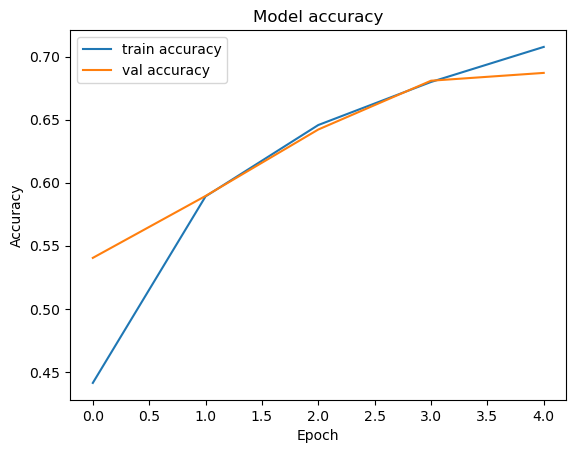

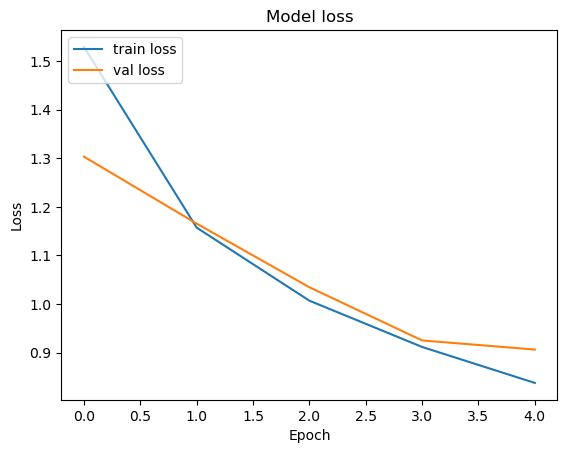

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [15]:
# Save the model
model.save('image_classification_model.h5')


In [17]:
model = tf.keras.models.load_model('image_classification_model.h5')


### Test the Model with New Images

In [25]:
import numpy as np
import cv2  # Optional: If you need to load and preprocess custom images

# Example for a new imagea
img = cv2.imread('Elephant.jpg')  # Read an image
img = cv2.resize(img, (32, 32))  # Resize to match input dimensions
img = img / 255.0  # Normalize

# Make a prediction
prediction = model.predict(np.expand_dims(img, axis=0))  # Add batch dimension
predicted_class = np.argmax(prediction)  # Get the index of the highest probability
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted class: 1
